In [1]:
from __future__ import print_function,absolute_import,division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.datasets import imdb


In [4]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=1000)

In [5]:
x_train.shape

(25000,)

In [6]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [8]:
tokenizer=Tokenizer(num_words=1000)
x_train=tokenizer.sequences_to_matrix(x_train,mode='binary')
x_test=tokenizer.sequences_to_matrix(x_test,mode='binary')
print(x_train[0])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [9]:
from tensorflow.keras.utils import to_categorical


In [10]:
y_train=to_categorical(y_train,2)
y_test=to_categorical(y_test,2)

In [11]:
y_train.shape

(25000, 2)

In [12]:
y_train[0]

array([0., 1.], dtype=float32)

In [14]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [16]:
model=Sequential([
    Dense(512,activation='relu',input_dim=1000),
    Dropout(0.5),
    Dense(2,activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               512512    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 513,538
Trainable params: 513,538
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
hist=model.fit(x_train,y_train,verbose=2,validation_data=(x_test,y_test),epochs=10,batch_size=32)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 - 5s - loss: 0.3946 - accuracy: 0.8255 - val_loss: 0.3373 - val_accuracy: 0.8617
Epoch 2/10
25000/25000 - 4s - loss: 0.3345 - accuracy: 0.8665 - val_loss: 0.3517 - val_accuracy: 0.8538
Epoch 3/10
25000/25000 - 4s - loss: 0.3193 - accuracy: 0.8790 - val_loss: 0.3583 - val_accuracy: 0.8575
Epoch 4/10
25000/25000 - 4s - loss: 0.3107 - accuracy: 0.8853 - val_loss: 0.3694 - val_accuracy: 0.8591
Epoch 5/10
25000/25000 - 4s - loss: 0.3036 - accuracy: 0.8914 - val_loss: 0.3801 - val_accuracy: 0.8595
Epoch 6/10
25000/25000 - 4s - loss: 0.2974 - accuracy: 0.8982 - val_loss: 0.3955 - val_accuracy: 0.8571
Epoch 7/10
25000/25000 - 4s - loss: 0.2874 - accuracy: 0.9034 - val_loss: 0.4269 - val_accuracy: 0.8590
Epoch 8/10
25000/25000 - 4s - loss: 0.2749 - accuracy: 0.9103 - val_loss: 0.4435 - val_accuracy: 0.8580
Epoch 9/10
25000/25000 - 4s - loss: 0.2634 - accuracy: 0.9146 - val_loss: 0.4768 - val_accuracy: 0.8597
Epoch 10/10
25

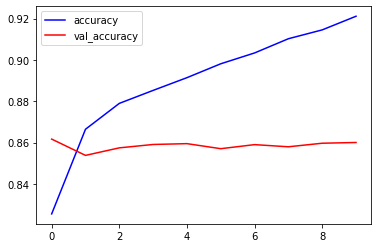

In [20]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='accuracy')
plt.plot(epochs,val_acc,'r',label='val_accuracy')
plt.legend()
plt.show()

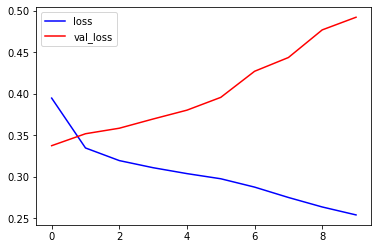

In [21]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']

plt.plot(epochs,loss,'b',label='loss')
plt.plot(epochs,val_loss,'r',label='val_loss')
plt.legend()
plt.show()